# ADAPTIVE BOOSTING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,1,1,1102,2,1,1.0,2,3,2,7,4,2,5993.0,1,0,0,1,4.0,5.0
1,0,2,279,1,8,1.0,3,2,2,6,2,1,5130.0,2,1,3,3,7.0,7.0
2,1,1,1373,1,2,5.0,4,2,1,2,3,2,2090.0,1,0,3,3,0.0,0.0
3,0,2,1392,1,3,1.0,4,3,1,6,3,1,2909.0,1,0,3,3,7.0,0.0
4,0,1,591,1,2,2.0,1,3,1,2,2,1,3468.0,2,1,3,3,2.0,2.0


In [5]:
x=df.drop(['Attrition'],axis=1)
y=df.Attrition

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
ada = AdaBoostClassifier()
params = {'n_estimators':range(1,250)}

In [10]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(ada,params,cv = 10)

In [11]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': range(1, 250)})

In [12]:
search.best_estimator_

AdaBoostClassifier(n_estimators=67)

In [13]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth = None)
ada2 = AdaBoostClassifier(dtree,n_estimators=222)

In [14]:
model_ada = ada2.fit(x_train,y_train)

In [15]:
y_pred = ada2.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [17]:
accuracy_score(y_test,y_pred)

0.7517006802721088

In [18]:
print(confusion_matrix(y_test,y_pred))

[[206  45]
 [ 28  15]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       251
           1       0.25      0.35      0.29        43

    accuracy                           0.75       294
   macro avg       0.57      0.58      0.57       294
weighted avg       0.79      0.75      0.77       294



In [20]:
y_pred_prob = model_ada.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.5847771703882145

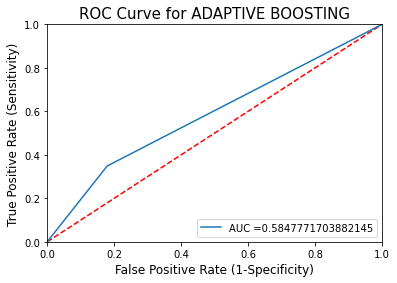

In [21]:
plt.title('ROC Curve for ADAPTIVE BOOSTING',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

# GRADIENT BOOSTING

In [22]:
df2=pd.read_csv('HR.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [23]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
df2.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,1,1,1102,2,1,1.0,2,3,2,7,4,2,5993.0,1,0,0,1,4.0,5.0
1,0,2,279,1,8,1.0,3,2,2,6,2,1,5130.0,2,1,3,3,7.0,7.0
2,1,1,1373,1,2,5.0,4,2,1,2,3,2,2090.0,1,0,3,3,0.0,0.0
3,0,2,1392,1,3,1.0,4,3,1,6,3,1,2909.0,1,0,3,3,7.0,0.0
4,0,1,591,1,2,2.0,1,3,1,2,2,1,3468.0,2,1,3,3,2.0,2.0


In [25]:
x2=df.drop(['Attrition'],axis=1)
y2=df.Attrition

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=8)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [29]:
params = {'n_estimators':range(1,250)}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(gb,params,cv = 10)
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'n_estimators': range(1, 250)})

In [32]:
search.best_estimator_

GradientBoostingClassifier(n_estimators=57)

In [33]:
gb = search.best_estimator_

In [34]:
model_gb = gb.fit(x_train,y_train)

In [35]:
y_pred = model_gb.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [37]:
accuracy_score(y_test,y_pred)

0.8537414965986394

In [38]:
print(confusion_matrix(y_test,y_pred))

[[243   8]
 [ 35   8]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       251
           1       0.50      0.19      0.27        43

    accuracy                           0.85       294
   macro avg       0.69      0.58      0.59       294
weighted avg       0.82      0.85      0.82       294



In [40]:
y_pred_prob = model_gb.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
Area = auc(fpr,tpr)
Area

0.7935699064208284

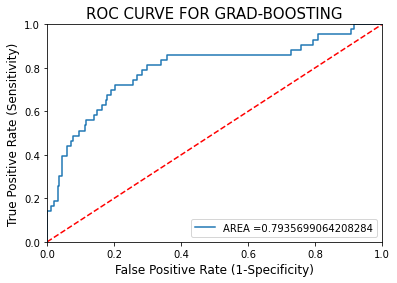

In [41]:
plt.plot([0,1],[0,1],'--r');
plt.plot(fpr,tpr,label = 'AREA =' +str(Area),);
plt.legend(loc = 4)
plt.ylim([0,1]);
plt.xlim([0,1]);
plt.title('ROC CURVE FOR GRAD-BOOSTING',size = 15);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);
plt.xlabel('False Positive Rate (1-Specificity)',size = 12);

# XG BOOSTING

In [42]:
df3=pd.read_csv('HR.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [43]:
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
df3.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,1,1,1102,2,1,1.0,2,3,2,7,4,2,5993.0,1,0,0,1,4.0,5.0
1,0,2,279,1,8,1.0,3,2,2,6,2,1,5130.0,2,1,3,3,7.0,7.0
2,1,1,1373,1,2,5.0,4,2,1,2,3,2,2090.0,1,0,3,3,0.0,0.0
3,0,2,1392,1,3,1.0,4,3,1,6,3,1,2909.0,1,0,3,3,7.0,0.0
4,0,1,591,1,2,2.0,1,3,1,2,2,1,3468.0,2,1,3,3,2.0,2.0


In [45]:
x3=df.drop(['Attrition'],axis=1)
y3=df.Attrition

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.2,random_state=8)

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
import xgboost 
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [49]:
classifier = XGBClassifier()
classifier.fit(x_train,y_train)
y_pred_6=classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

In [51]:
model_comparison={}

In [52]:
print(f"Model Accuracy : {accuracy_score(y_pred_6,y_test)*100:.2f}%")

print(f"Model F1-Score : {f1_score(y_pred_6,y_test,average='weighted')*100:.2f}%")

accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(classification_report(y_pred,y_test,zero_division=1))

model_comparison['Xg Boost']=[accuracy_score(y_pred_6,y_test),f1_score(y_pred_6,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 86.39%
Model F1-Score : 87.74%
Cross Val Accuracy: 85.63 %
Cross Val Standard Deviation: 0.74 %
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       278
           1       0.19      0.50      0.27        16

    accuracy                           0.85       294
   macro avg       0.58      0.69      0.59       294
weighted avg       0.93      0.85      0.88       294

